In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0, os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt


In [61]:
from getdist import loadMCSamples
sample = loadMCSamples("/home/nxk230035/scratch/projects/planck2018/OutputChains/chains/")

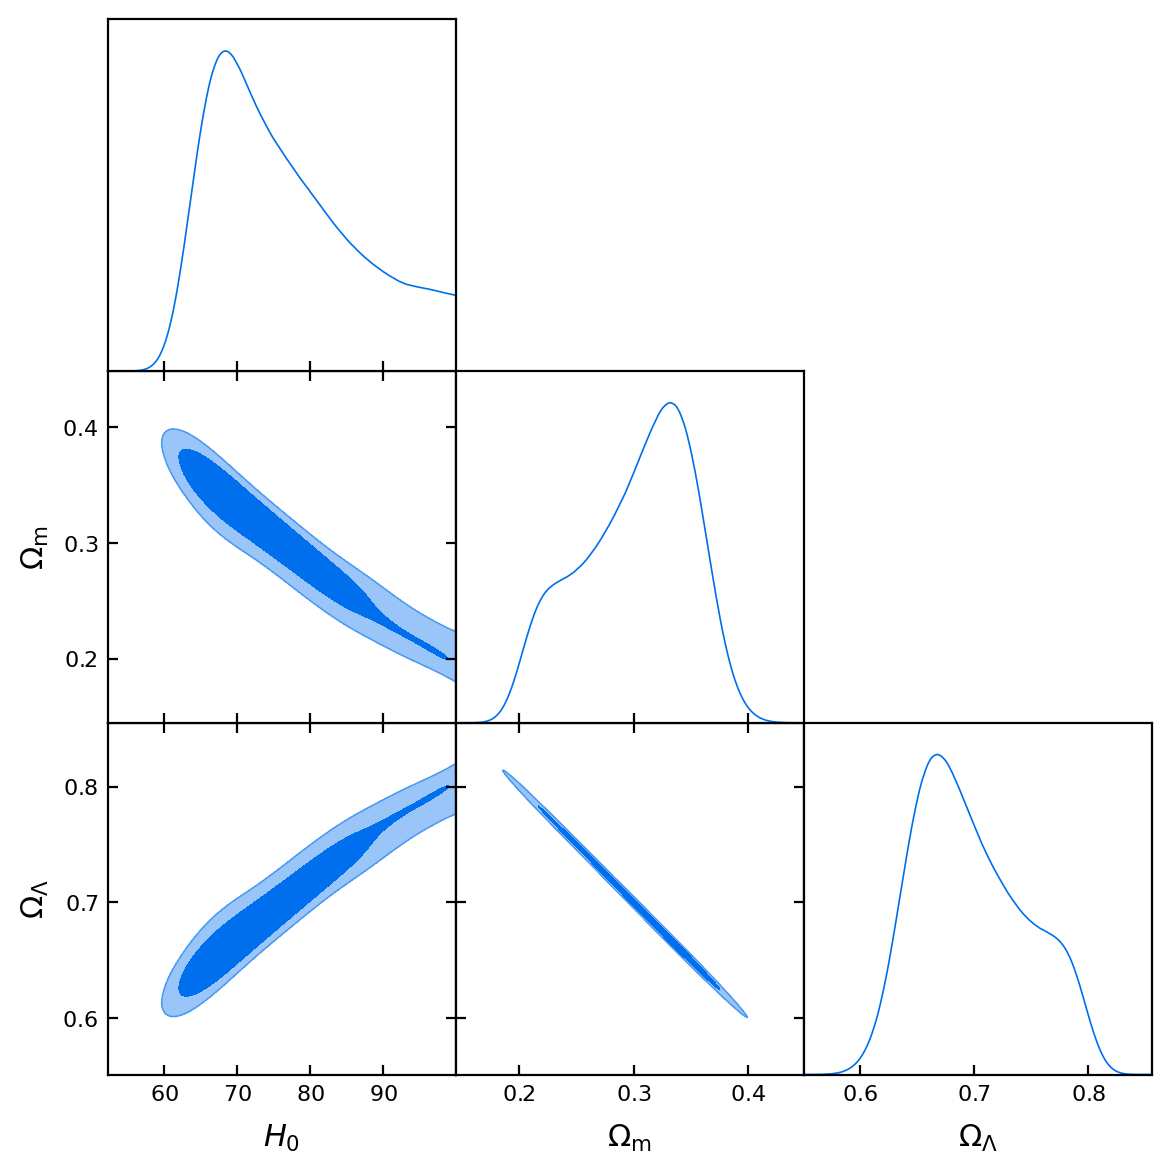

In [4]:
from getdist import plots
g = plots.get_subplot_plotter(subplot_size=2)  # Adjust the size according to your needs

# Plot the triangle plot
param_subset = ["H0", "omegam", "omega_de"]

g.triangle_plot(readsamps, params=param_subset, filled=True)

# Show the plot
plt.show()

In [3]:
print(readsamps.getLikeStats())

Best fit sample -log(Like) = 209.952800
Ln(mean 1/like) = 217.968623
mean(-Ln(like)) = 213.542073
-Ln(mean like)  = 212.499064
2*Var(Ln(like)) = 6.545072

parameter                                       bestfit        lower1         upper1         lower2         upper2
logA                                            3.1214599E+00  2.9906792E+00  3.3369894E+00  2.9739161E+00  3.3831238E+00   \log(10^{10} A_\mathrm{s})
ns                                              1.0232560E+00  9.4609221E-01  1.1485325E+00  9.3324945E-01  1.1735613E+00   n_\mathrm{s}
theta_MC_100                                    1.0121581E+00  1.0019970E+00  1.0651400E+00  9.9987742E-01  1.0657100E+00   100\theta_\mathrm{MC}
ombh2                                           3.7906596E-02  1.7341976E-02  7.7854392E-02  1.5005406E-02  7.9826236E-02   \Omega_\mathrm{b} h^2
omch2                                           1.2440254E-01  1.1021401E-01  1.5235696E-01  1.0760816E-01  1.5680820E-01   \Omega_\mathrm{c} h^2
tau 

In [ ]:
param = 'H0'

# For MCMC chains
# sample is a getdist.mcsamples.MCSamples object

# Bestfit values for parameter
# print(f"Likelihood Stats:\n{sample.getLikeStats()}\n")
print(f"Bestfit = {sample.paramNames.parWithName(param).bestfit_sample}")
print(f"upper1 = {sample.paramNames.parWithName(param).ND_limit_top[0]}")
print(f"lower1 = {sample.paramNames.parWithName(param).ND_limit_bot[0]}\n")

Bestfit = 69.263109
upper1 = 99.96891
lower1 = 59.376041



In [85]:
# Marginalized values
print(f"Mean +/- errors: {sample.getInlineLatex(param,limit=1)}")
print(f"Mean = {sample.paramNames.parWithName(param).mean}")
print(f"StdDev = {sample.paramNames.parWithName(param).err}\n")

# print(f"Marginalized Stats:\n{sample.getMargeStats()}")
print(f"Marginalized lower1:{sample.getMargeStats().parWithName(param).limits[0].lower}")
print(f"Marginalized upper1:{sample.getMargeStats().parWithName(param).limits[0].upper}\n")

Mean +/- errors: H_0 = 76.3^{+5.8}_{-13}
Mean = 76.2891210684041
StdDev = 9.9250167942343

Marginalized lower1:63.34653347881287
Marginalized upper1:82.1027083353118



In [82]:
# Priors
print(f"Prior lower: {sample.getLower(param)}")
print(f"Prior upper: {sample.getUpper(param)}")
print(f"Param means: {sample.getMeans()}\n")
print(f"Param variances: {sample.getVars()}\n")

Prior lower: 20.0
Prior upper: 100.0
Param means: [ 3.12603543e+00  1.03280546e+00  1.02795455e+00  4.07128498e-02
  1.29777125e-01  6.44028918e-02  1.00002197e+00  2.28390787e-09
  7.62891211e+01  3.01594843e-01  1.71134842e-01  6.98340072e-01
  2.49599959e-01  2.50945134e-01  1.23968992e+00  6.16821173e+00
  8.25700737e-01  9.48572902e-01  4.50239791e-01  6.09157341e-01
  2.28390787e+00  2.00600652e+00  1.25195683e+01  1.29283816e+02
  4.37077580e+02 -4.99671743e+00 -4.99671743e+00  4.37077580e+02
  2.21041242e+01  3.96442491e+02  9.33739268e+00  9.19357186e+00]

Param variances: [4.82975700e-03 1.50457818e-03 2.90935047e-04 1.24751263e-04
 6.31137949e-05 1.63947960e-04 6.35651850e-06 2.59480658e-20
 9.85059584e+01 2.41647653e-03 3.11380302e-04 2.41794175e-03
 2.55714853e-06 2.57561972e-06 2.29018486e-01 8.68146843e-01
 1.59682306e-03 8.26226459e-04 4.65294350e-04 1.65665571e-04
 2.59480658e-02 1.23026045e-02 1.04120074e+00 8.85078851e+01
 1.12967704e+01 5.01752749e-01 5.01752749e-01

In [83]:
# Covariance matrix for proposal distribution for future runs
print(f"Correlation matrix = {sample.corr(pars=[param])}")
print(f"Parameter covariance = {sample.cov(pars=[param])}\n")

Correlation matrix = [[1.]]
Parameter covariance = [[98.50595837]]



In [84]:
# Likelihood stats
print(f"MCMC bestfit -loglike ~ MAP: {sample.getLikeStats().logLike_sample}")
print(f"log(mean invLike): {sample.getLikeStats().logMeanInvLike}")
print(f"mean(-loglike): {sample.getLikeStats().meanLogLike}")
print(f"-log(mean Like): {sample.getLikeStats().logMeanLike}")
print(f"2*var(loglike): {2*sample.getLikeStats().varLogLike}")

MCMC bestfit -loglike ~ MAP: 209.9528
log(mean invLike): 217.9686232748538
mean(-loglike): 213.5420725778769
-log(mean Like): 212.49906448937017
2*var(loglike): 6.545072206616169


In [ ]:
# Bestfit stats : needs a .minimum file
#print(f"GetBestFit = {sample.getBestFit(max_posterior=False)}")
